In [1]:
import numpy as np 
import pandas as pd
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv("G:/儿童骨密度/DATA/Raw data/p_TP1NP_2.csv") 
df.head() 

,Gender,Age,Weight,Height,BMI,Total BMD,Lumbar spine BMD,TBLH BMD,TBLH BMD Z -score,Total fat percentage,...,LDL,TC,FBG,TyG index,HOMA-IR,HbA1c,Spexin,FGF23,"1,25(OH)2D",target
0,0,11,49.0,162.9,18.47,0.97,0.74,0.88,1.07,28.4,...,2.44,2.87,5.20,8.72,2.35,5.27,0.52,46.11,65.30,0
1,0,10,41.3,161.5,15.83,0.90,0.64,0.80,1.42,28.6,...,1.40,2.68,5.14,8.23,3.05,4.59,0.52,32.61,57.26,0
2,0,11,53.0,161.1,20.42,0.97,0.72,0.85,1.92,35.7,...,2.18,3.86,4.56,8.34,2.15,4.25,0.68,69.63,65.90,1
3,1,11,50.5,161.0,19.48,0.75,0.79,0.70,1.35,26.0,...,2.31,2.72,4.87,8.53,2.87,5.16,0.55,44.47,92.20,1
4,0,11,47.2,159.4,18.58,1.05,0.82,0.92,0.82,24.0,...,2.30,3.29,5.33,8.63,2.15,4.22,0.63,39.76,25.60,0


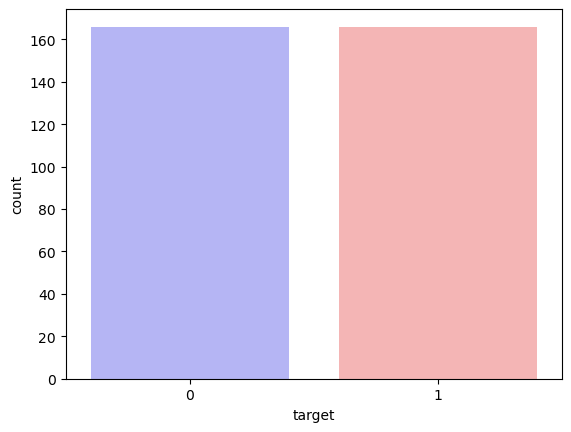

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns #导入seaborn画图工具箱
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [3]:
# 将某些特征转换为数值类型的哑变量
#a = pd.get_dummies(df['cp'], prefix = "cp")
#b = pd.get_dummies(df['thal'], prefix = "thal")
#c = pd.get_dummies(df['slope'], prefix = "slope")
#frames = [df, a, b, c]
#df = pd.concat(frames, axis = 1)
#df.head()
#df = df.drop(columns = ['ID'])#去除ID列
df.head()

,Gender,Age,Weight,Height,BMI,Total BMD,Lumbar spine BMD,TBLH BMD,TBLH BMD Z -score,Total fat percentage,...,LDL,TC,FBG,TyG index,HOMA-IR,HbA1c,Spexin,FGF23,"1,25(OH)2D",target
0,0,11,49.0,162.9,18.47,0.97,0.74,0.88,1.07,28.4,...,2.44,2.87,5.20,8.72,2.35,5.27,0.52,46.11,65.30,0
1,0,10,41.3,161.5,15.83,0.90,0.64,0.80,1.42,28.6,...,1.40,2.68,5.14,8.23,3.05,4.59,0.52,32.61,57.26,0
2,0,11,53.0,161.1,20.42,0.97,0.72,0.85,1.92,35.7,...,2.18,3.86,4.56,8.34,2.15,4.25,0.68,69.63,65.90,1
3,1,11,50.5,161.0,19.48,0.75,0.79,0.70,1.35,26.0,...,2.31,2.72,4.87,8.53,2.87,5.16,0.55,44.47,92.20,1
4,0,11,47.2,159.4,18.58,1.05,0.82,0.92,0.82,24.0,...,2.30,3.29,5.33,8.63,2.15,4.22,0.63,39.76,25.60,0


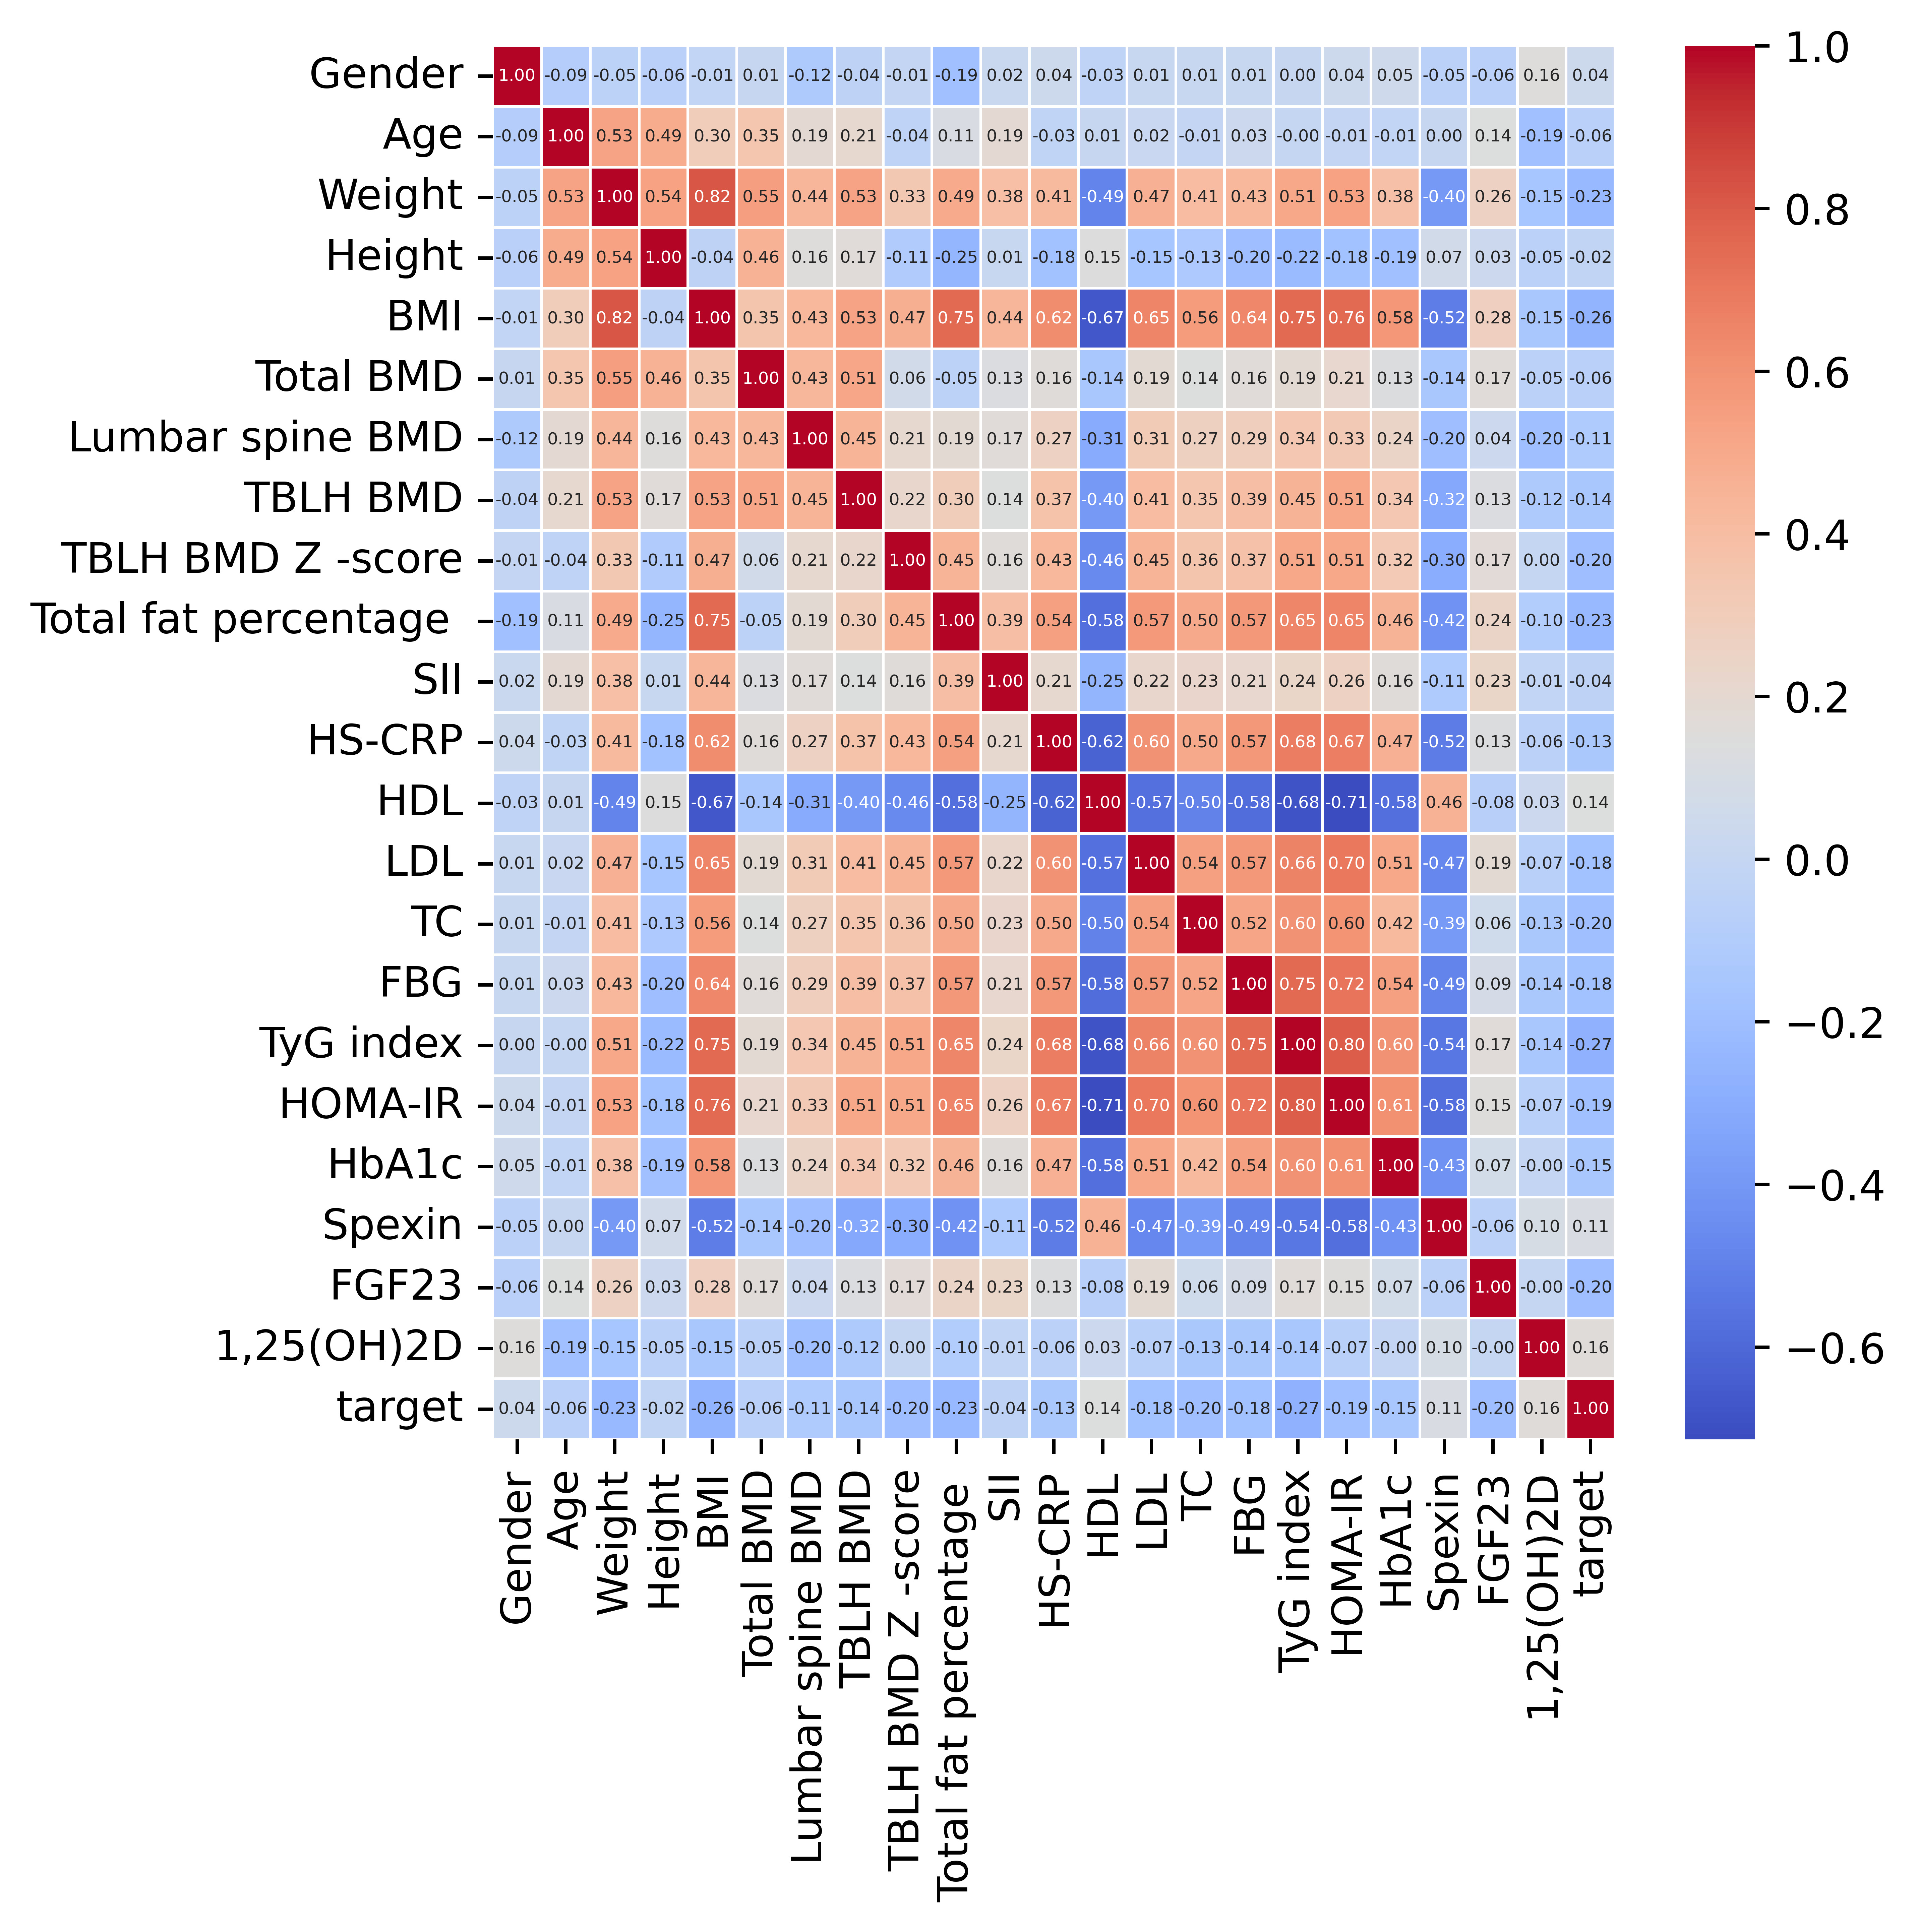

In [4]:
#特征相关性热图
# 导入数据可视化所需要的库
import matplotlib.pyplot as plt #Matplotlib为 Python画图工具库
import seaborn as sns #Seaborn为统计学数据可视化工具库
#增加图片清晰度

#对所有的标签和特征两两显示其相关性的热力图
plt.figure(figsize=(6, 6), dpi=900)
sns.heatmap(df.corr(),cmap='coolwarm',annot=True , fmt='.2f', linewidths=.5,annot_kws={'size': 4})

plt.show() #plt代表英文 plot, 就是画图的意思
#1. df_heart: 需要展示的数据，可以是DataFrame或numpy数组
#2. cmap: 颜色映射表，设置热图的颜色主题。它可以是内置颜色映射表（如'coolwarm'、'viridis'、'mako'、'rocket'、'copper'等），也可以是自定义的颜色列表
#3. annot: 是否显示每个单元格的数值
#4. fmt: 数值格式，用于控制annot参数输出数值的格式,.2f保留2位小数
#5. linewidths: 热图中每个矩形之间的白线间隔线宽度,annot_kws={'size': 6}设置字体大小

In [5]:
#2.构建特征集和标签集
X = df.drop(['target'], axis = 1) # 构建特征集
y = df.target.values # 构建标签集
y = y.reshape(-1, 1) # -1是相对索引 , 等价于 len(y)
print("张量 X的形状 :", X.shape)
print("张量 y的形状 :", y.shape)

张量 X的形状 : (332, 22)
张量 y的形状 : (332, 1)


In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=46)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler() 
X_train = scaler.ﬁt_transform(X_train) 
X_test = scaler.transform(X_test) 

SVM混淆矩阵:
 [[27  4]
 [ 0 36]]


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: title={'center': 'SVM(Best Score)Confusion Matrix'}>

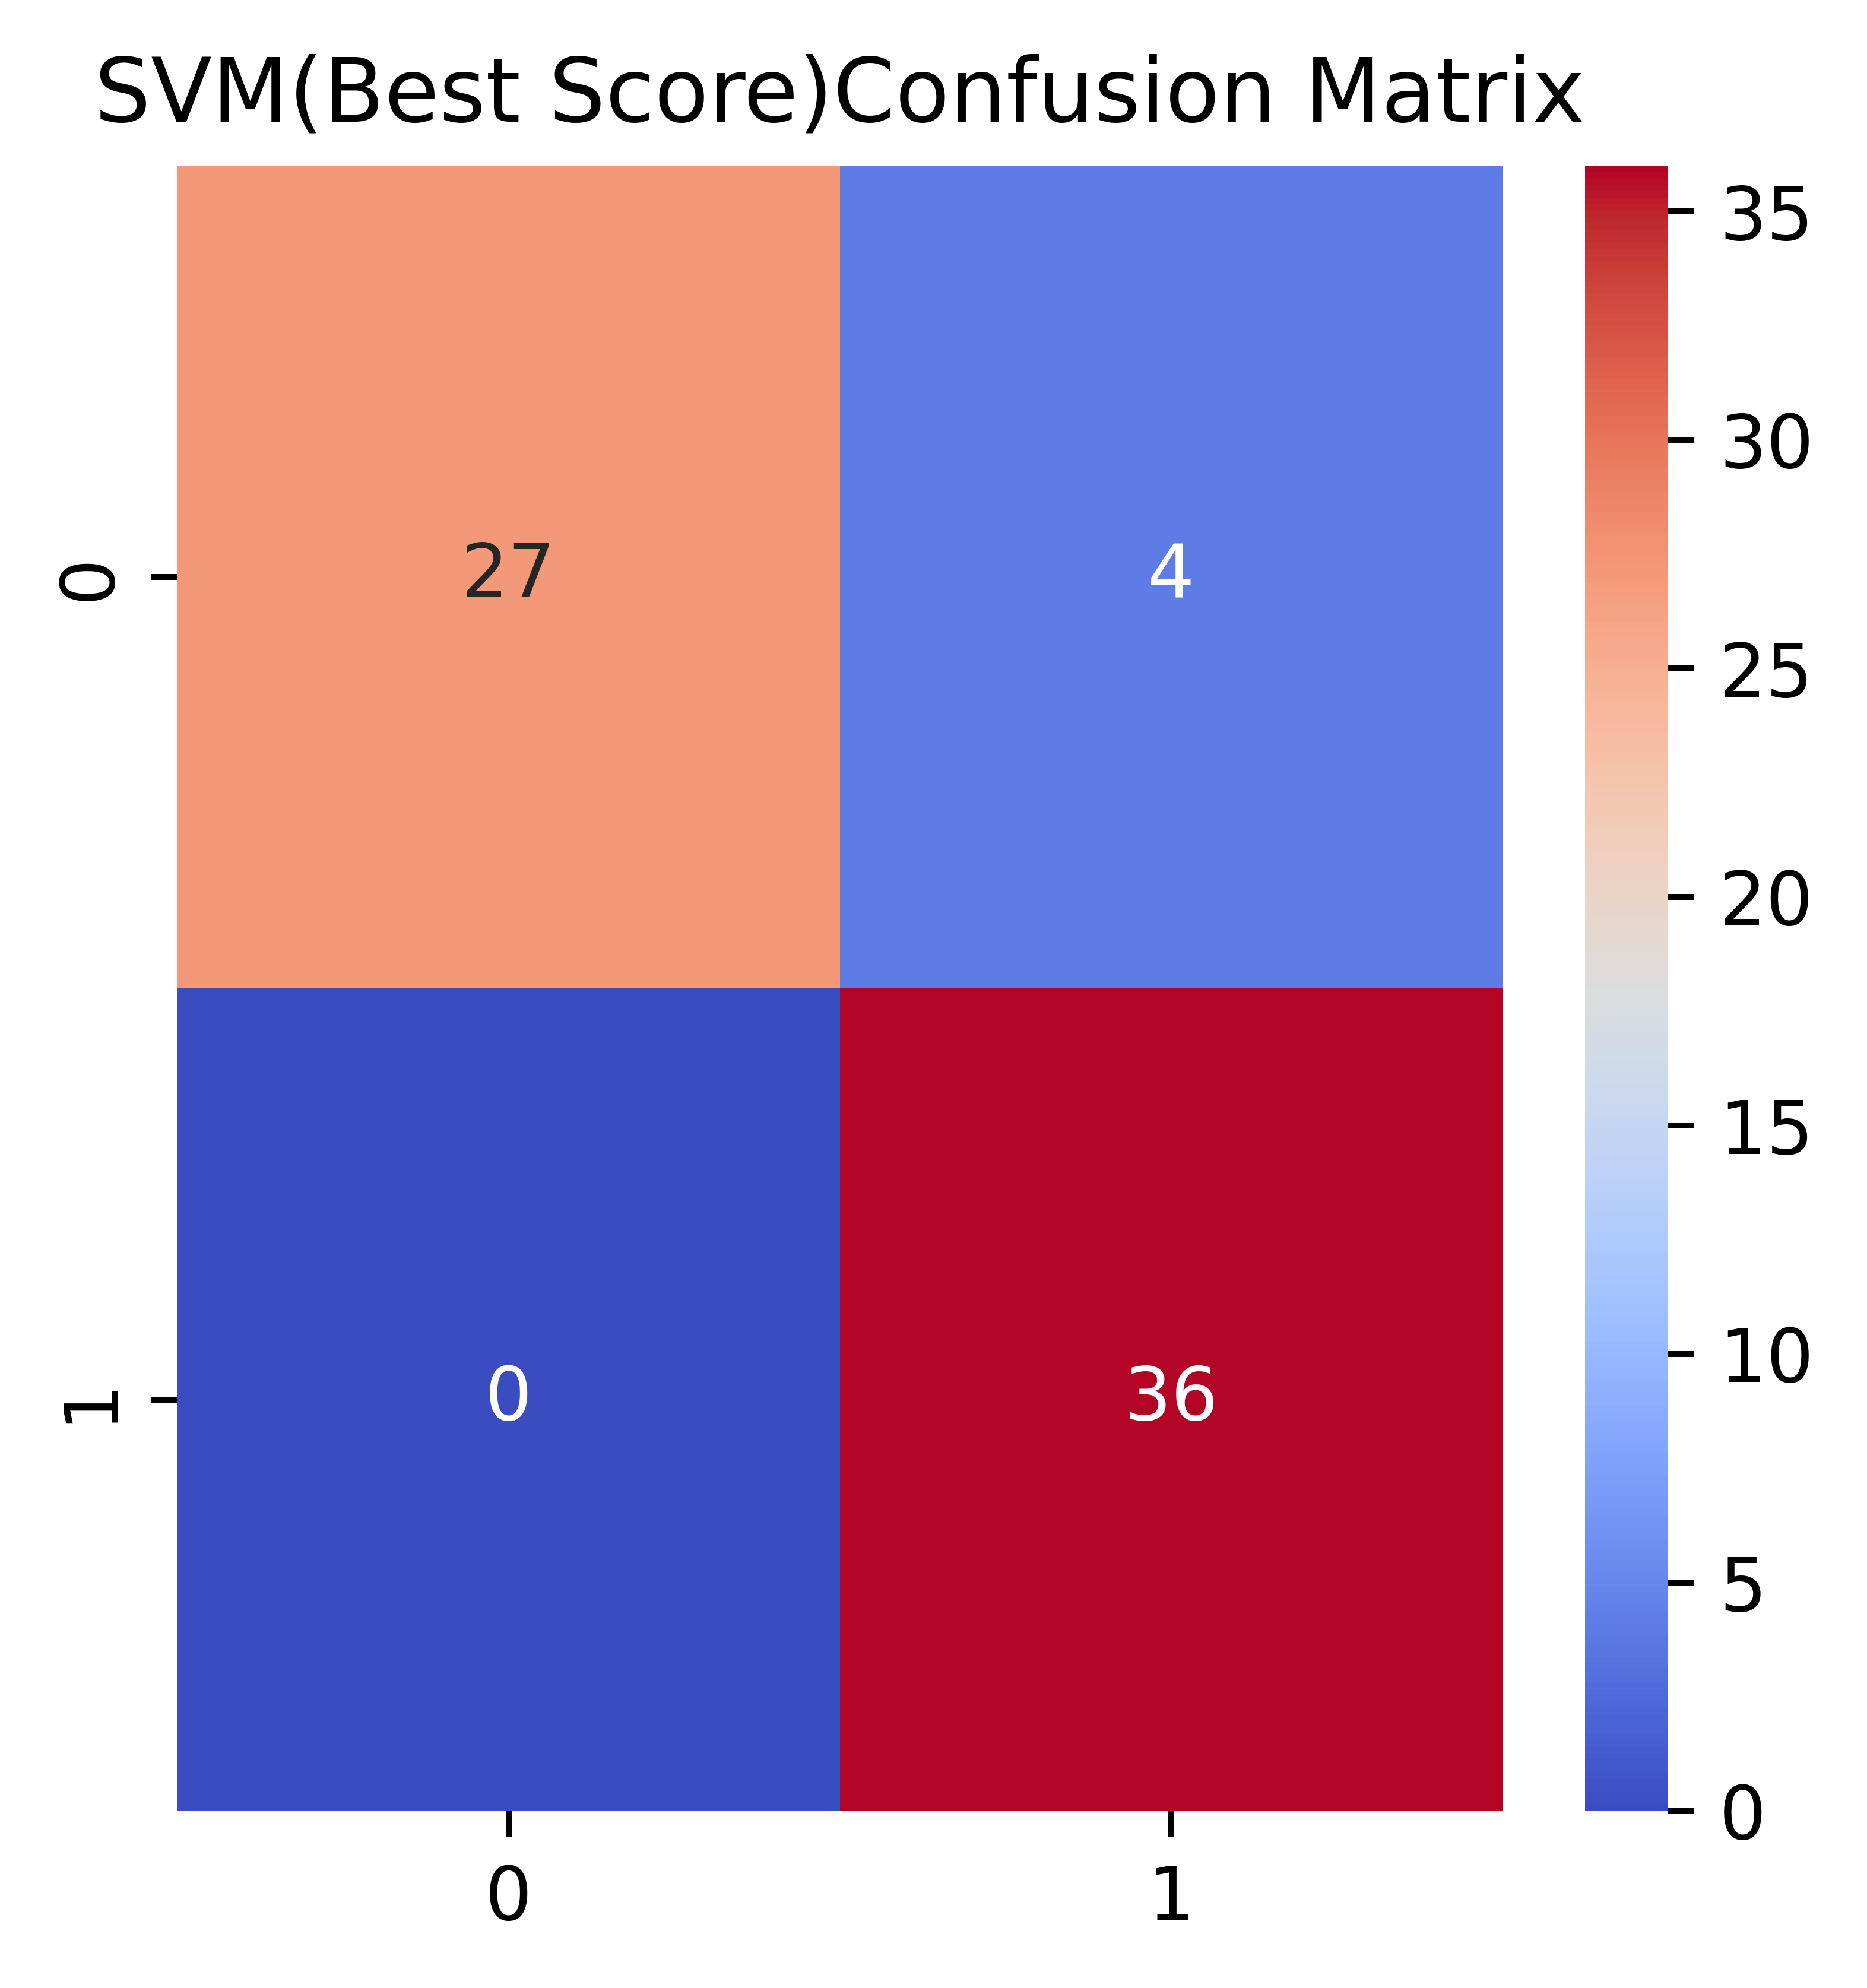

In [8]:

import random
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
from sklearn.metrics import classiﬁcation_report 
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
from sklearn.metrics import (f1_score, confusion_matrix) 
svm = SVC(random_state = 0,probability=True)
svm.fit(X_train, y_train)
y_pred1 = svm.predict(X_test) 
svm_acc = svm.score(X_test,y_test)*100
y_prob1 = svm.predict_proba(X_test)[:,1]
cm_dot_four = confusion_matrix(y_prob1 >= 0.5, y_pred1)
plt.figure(figsize=(4, 4), dpi=900)
print('SVM混淆矩阵:\n', cm_dot_four)
plt.title("SVM(Best Score)Confusion Matrix")
sns.heatmap(cm_dot_four, annot=True, cmap="coolwarm", fmt="d", cbar="TRUE")

In [9]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

y_pred = y_prob1
y_true = y_test

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

Original ROC area: 0.683
Bootstrap #1 ROC area: 0.583
Bootstrap #2 ROC area: 0.691
Bootstrap #3 ROC area: 0.682
Bootstrap #4 ROC area: 0.657
Bootstrap #5 ROC area: 0.714
Bootstrap #6 ROC area: 0.737
Bootstrap #7 ROC area: 0.774
Bootstrap #8 ROC area: 0.669
Bootstrap #9 ROC area: 0.649
Bootstrap #10 ROC area: 0.583
Bootstrap #11 ROC area: 0.671
Bootstrap #12 ROC area: 0.625
Bootstrap #13 ROC area: 0.890
Bootstrap #14 ROC area: 0.640
Bootstrap #15 ROC area: 0.623
Bootstrap #16 ROC area: 0.768
Bootstrap #17 ROC area: 0.712
Bootstrap #18 ROC area: 0.641
Bootstrap #19 ROC area: 0.689
Bootstrap #20 ROC area: 0.694
Bootstrap #21 ROC area: 0.663
Bootstrap #22 ROC area: 0.601
Bootstrap #23 ROC area: 0.756
Bootstrap #24 ROC area: 0.871
Bootstrap #25 ROC area: 0.664
Bootstrap #26 ROC area: 0.671
Bootstrap #27 ROC area: 0.731
Bootstrap #28 ROC area: 0.649
Bootstrap #29 ROC area: 0.662
Bootstrap #30 ROC area: 0.738
Bootstrap #31 ROC area: 0.649
Bootstrap #32 ROC area: 0.736
Bootstrap #33 ROC area: 

Bootstrap #365 ROC area: 0.680
Bootstrap #366 ROC area: 0.702
Bootstrap #367 ROC area: 0.629
Bootstrap #368 ROC area: 0.713
Bootstrap #369 ROC area: 0.749
Bootstrap #370 ROC area: 0.621
Bootstrap #371 ROC area: 0.677
Bootstrap #372 ROC area: 0.746
Bootstrap #373 ROC area: 0.731
Bootstrap #374 ROC area: 0.743
Bootstrap #375 ROC area: 0.770
Bootstrap #376 ROC area: 0.826
Bootstrap #377 ROC area: 0.542
Bootstrap #378 ROC area: 0.752
Bootstrap #379 ROC area: 0.679
Bootstrap #380 ROC area: 0.647
Bootstrap #381 ROC area: 0.580
Bootstrap #382 ROC area: 0.654
Bootstrap #383 ROC area: 0.655
Bootstrap #384 ROC area: 0.699
Bootstrap #385 ROC area: 0.755
Bootstrap #386 ROC area: 0.691
Bootstrap #387 ROC area: 0.640
Bootstrap #388 ROC area: 0.683
Bootstrap #389 ROC area: 0.762
Bootstrap #390 ROC area: 0.715
Bootstrap #391 ROC area: 0.670
Bootstrap #392 ROC area: 0.533
Bootstrap #393 ROC area: 0.657
Bootstrap #394 ROC area: 0.669
Bootstrap #395 ROC area: 0.785
Bootstrap #396 ROC area: 0.754
Bootstra

Bootstrap #735 ROC area: 0.651
Bootstrap #736 ROC area: 0.563
Bootstrap #737 ROC area: 0.618
Bootstrap #738 ROC area: 0.798
Bootstrap #739 ROC area: 0.676
Bootstrap #740 ROC area: 0.724
Bootstrap #741 ROC area: 0.676
Bootstrap #742 ROC area: 0.619
Bootstrap #743 ROC area: 0.576
Bootstrap #744 ROC area: 0.462
Bootstrap #745 ROC area: 0.814
Bootstrap #746 ROC area: 0.655
Bootstrap #747 ROC area: 0.615
Bootstrap #748 ROC area: 0.575
Bootstrap #749 ROC area: 0.732
Bootstrap #750 ROC area: 0.669
Bootstrap #751 ROC area: 0.712
Bootstrap #752 ROC area: 0.702
Bootstrap #753 ROC area: 0.656
Bootstrap #754 ROC area: 0.723
Bootstrap #755 ROC area: 0.758
Bootstrap #756 ROC area: 0.794
Bootstrap #757 ROC area: 0.675
Bootstrap #758 ROC area: 0.662
Bootstrap #759 ROC area: 0.614
Bootstrap #760 ROC area: 0.685
Bootstrap #761 ROC area: 0.604
Bootstrap #762 ROC area: 0.681
Bootstrap #763 ROC area: 0.582
Bootstrap #764 ROC area: 0.613
Bootstrap #765 ROC area: 0.687
Bootstrap #766 ROC area: 0.666
Bootstra

In [10]:
#计算AUC95% CI
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("AUC 95%CI:[{:0.3f}-{:0.3}]".format(
    confidence_lower, confidence_upper))

AUC 95%CI:[0.576-0.792]


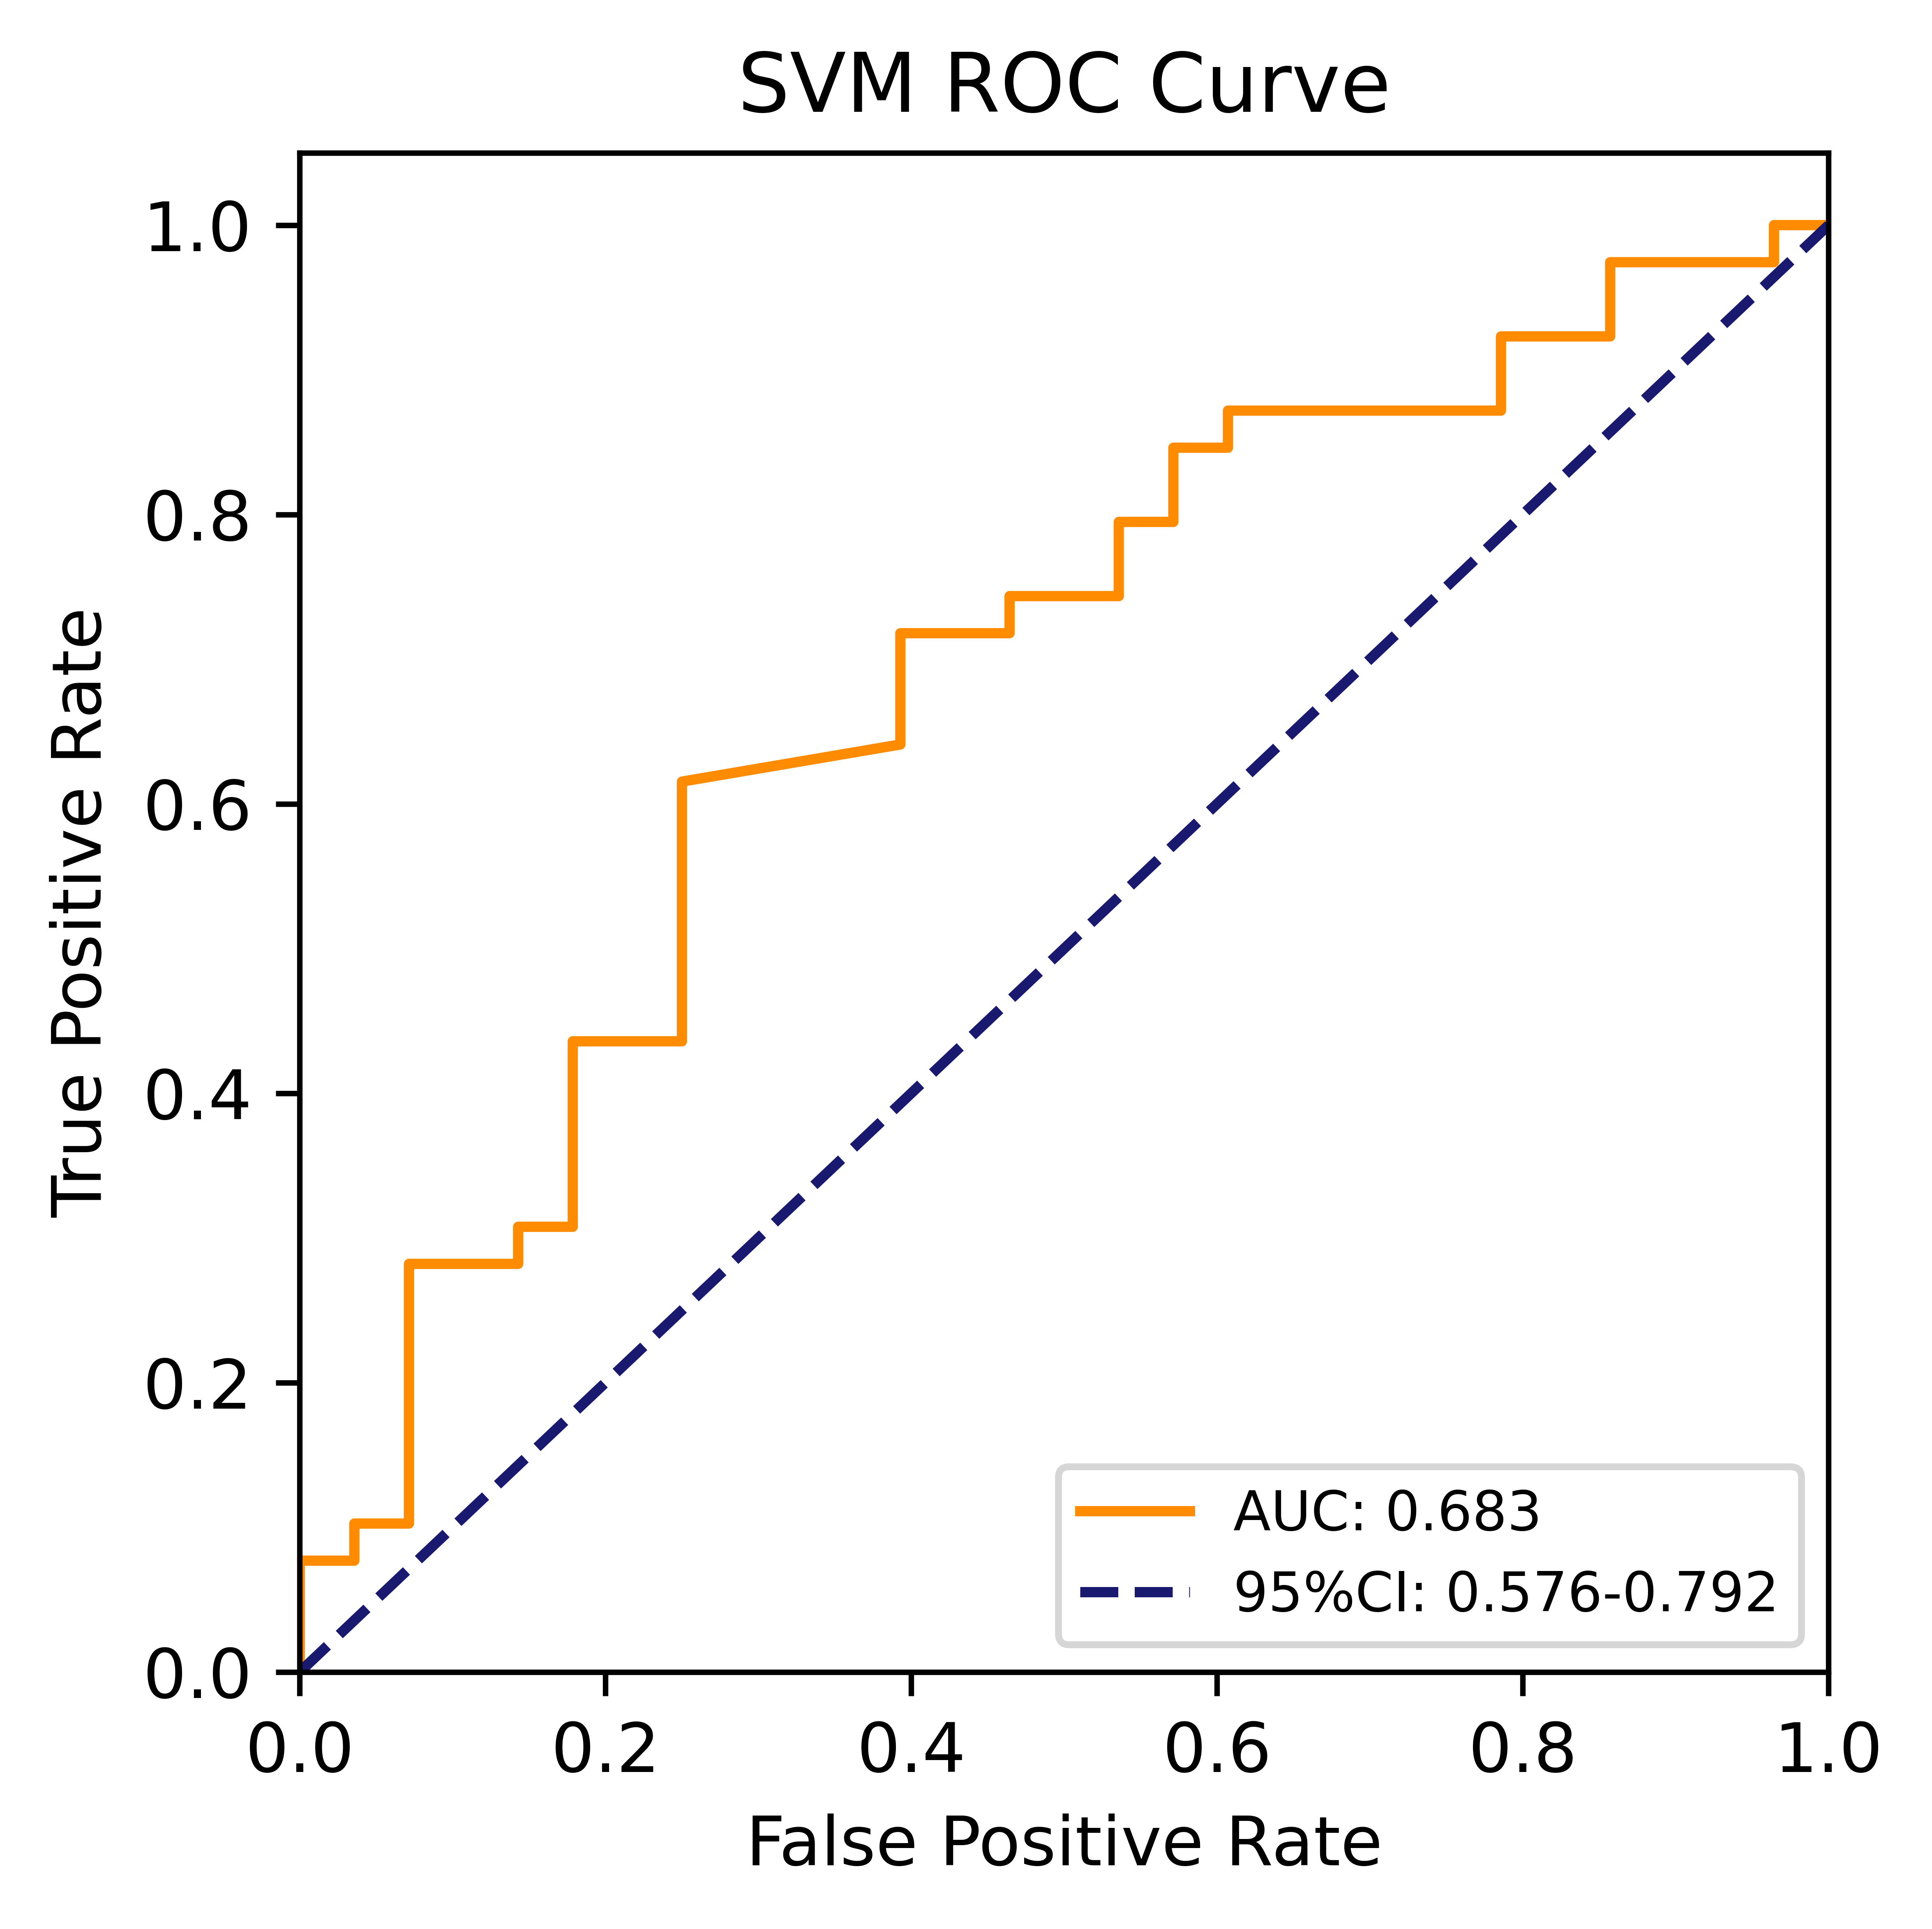

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
fpr, tpr, threshold = roc_curve(y_test,y_prob1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(4, 4), dpi=1200)
plt.plot(fpr, tpr, color='darkorange', lw=1.5, label='AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], color='midnightblue', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(['AUC: %0.3f' % roc_auc, "95%CI: {:0.3f}-{:0.3}".format(
    confidence_lower, confidence_upper)],loc="lower right", prop={'size': 8},markerfirst=True)
plt.show()

In [12]:
roc_auc

0.6831501831501832

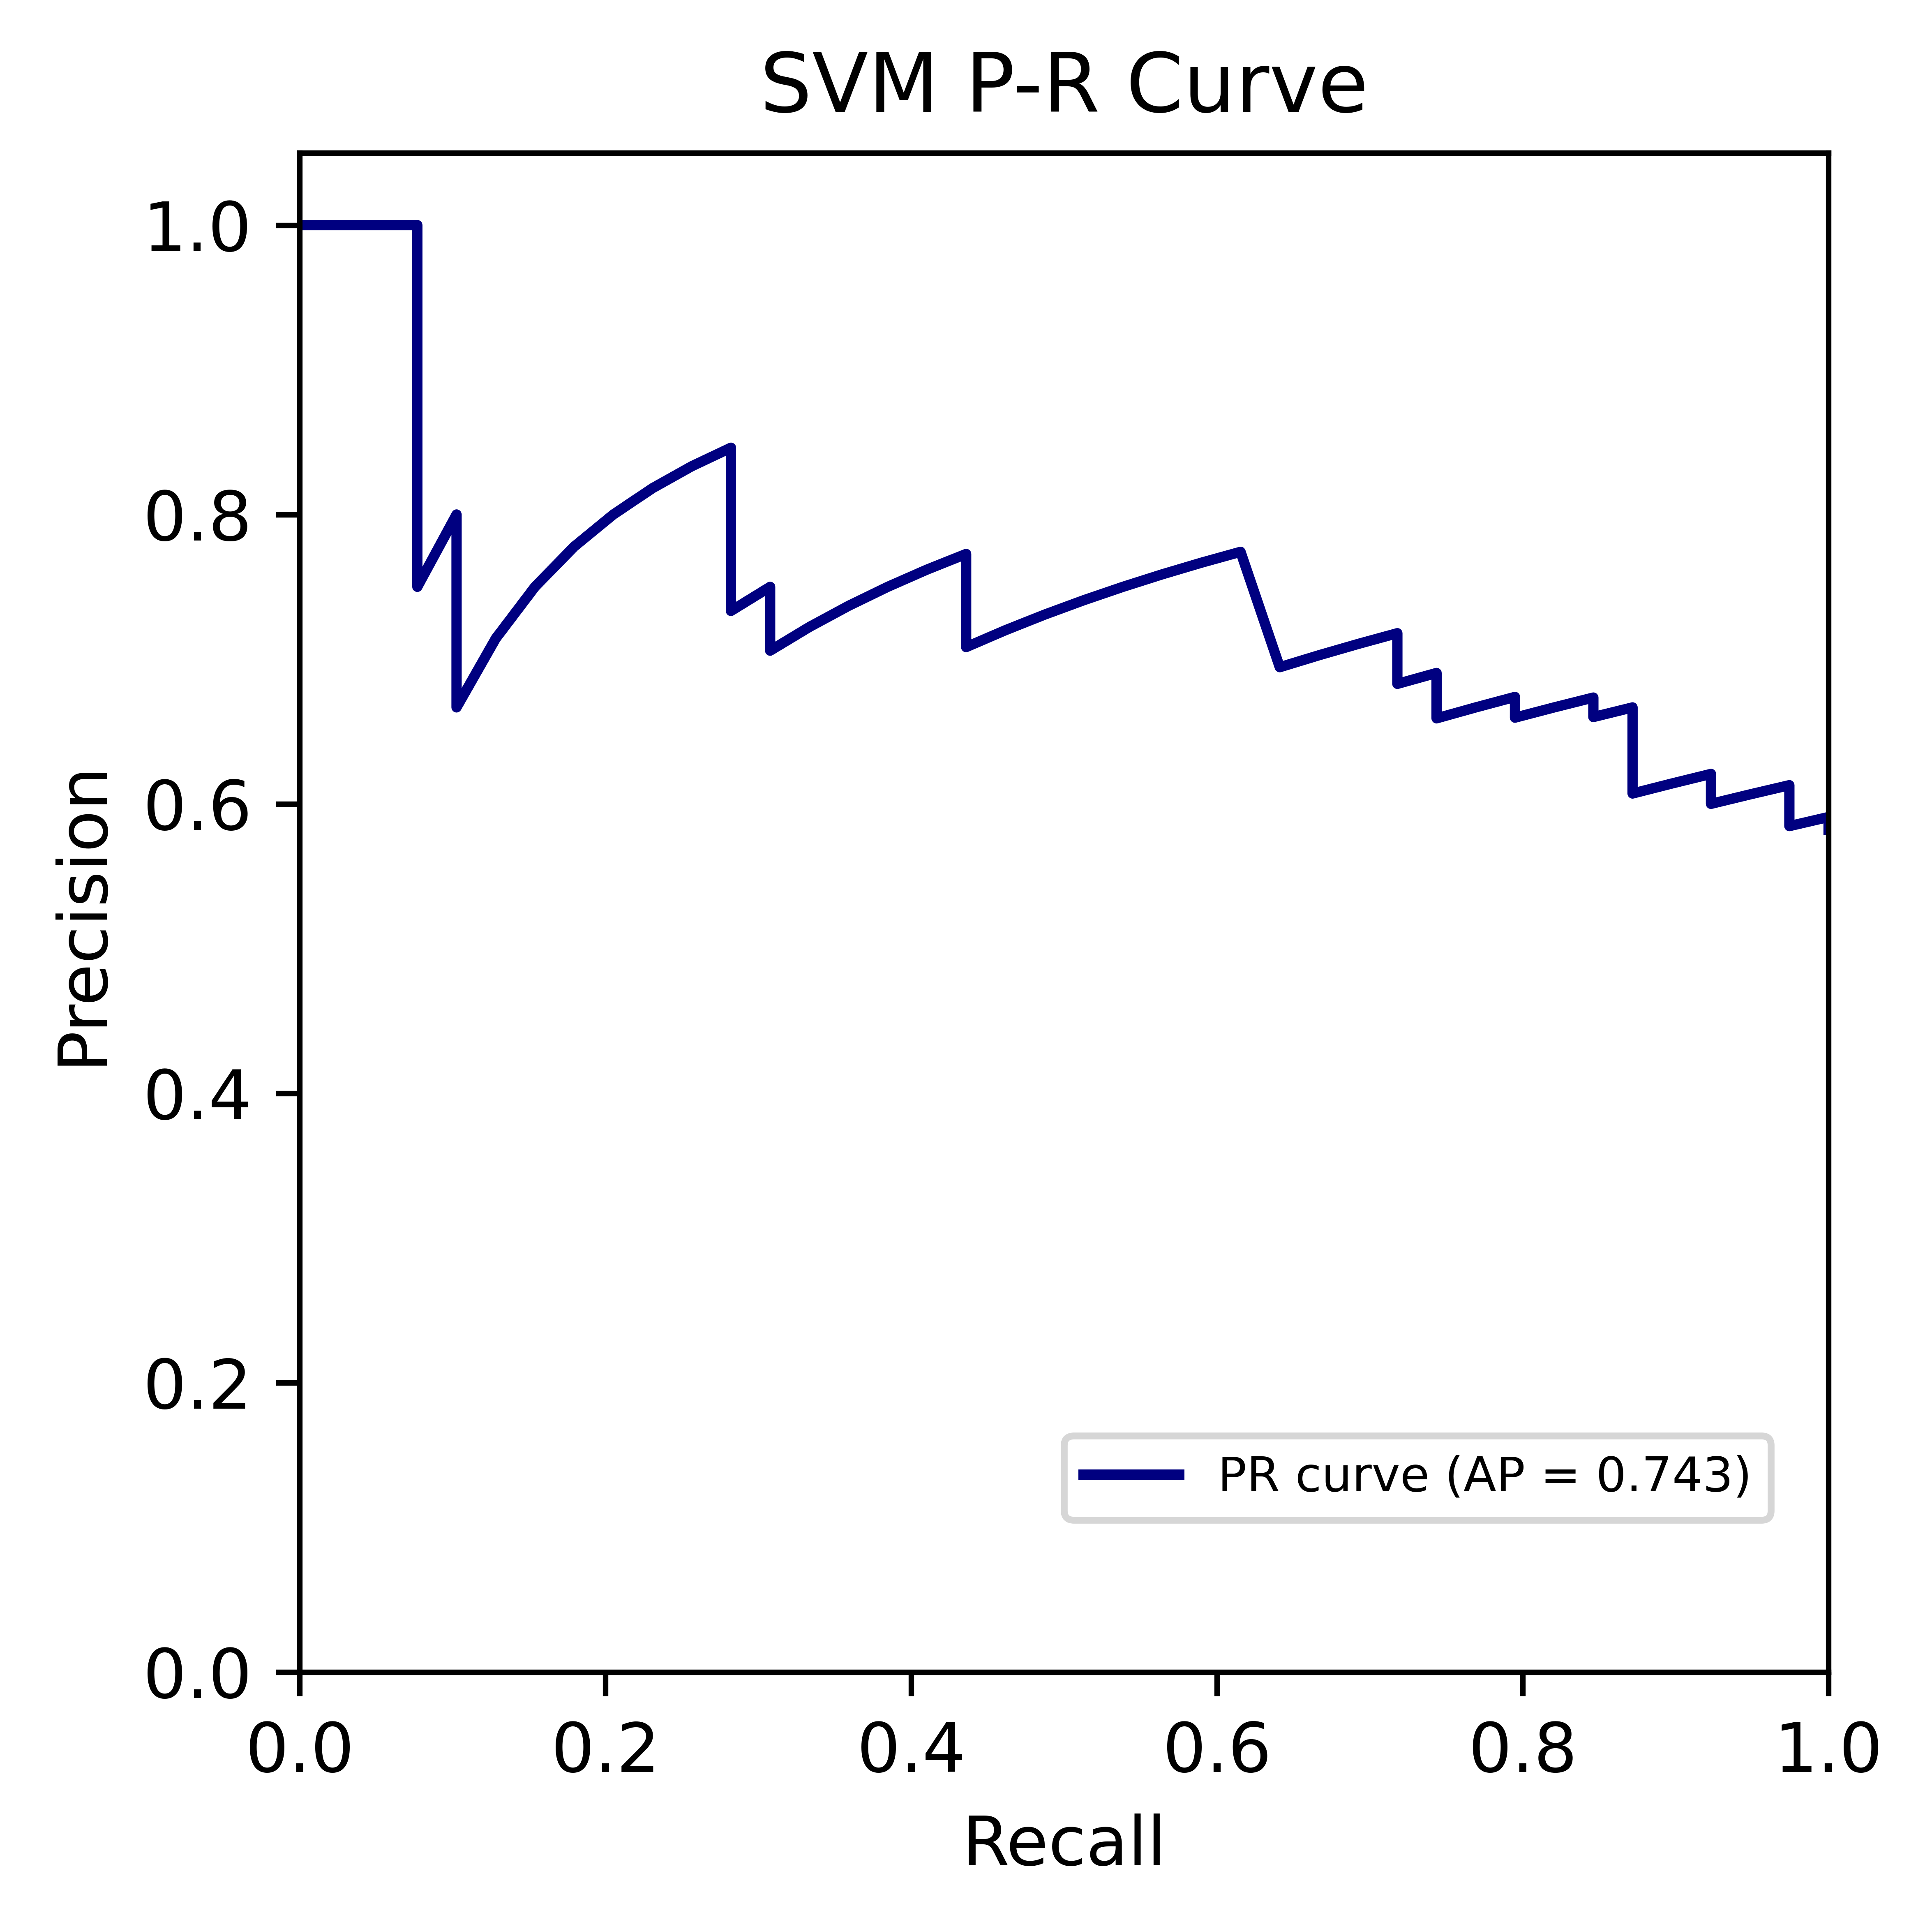

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

# y_true为样本实际的类别1为正例0为反例，y_scores为阈值

precision, recall, thresholds = precision_recall_curve(y_test,y_prob1)
AP = average_precision_score(y_test,y_prob1, average='macro', pos_label=1, sample_weight=None)
plt.figure(figsize=(4, 4), dpi=1200)
plt.plot(recall, precision, lw=1.5, color='navy', label='PR curve (AP = %0.3f)' % AP)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('SVM P-R Curve')
plt.legend(loc=(0.5,0.1), prop={'size': 7})#标签左下角坐标，字体7号
plt.show()

In [14]:
#计算AP值，PR曲线下面积，PR曲线下面的面积越大，模型的性能越好
from sklearn.metrics import precision_recall_curve, average_precision_score
AP = average_precision_score(y_test,y_prob1, average='macro', pos_label=1, sample_weight=None)
print('AP:', AP)

AP: 0.7431537171107729


In [15]:
##brier评分
from sklearn.metrics import brier_score_loss
print('Brier评分:', brier_score_loss(y_test,y_prob1))

Brier评分: 0.2323885467618632
